## EAE 598 - Applied Pandas Example

#### We had some frigid temperatures a couple of weeks ago, so we are going to analyze surface observations from the KDKB ASOS site using Pandas.

#### Import Pandas

In [1]:
import pandas as pd

#### Read in the KDKB ASOS data from Iowa State's IEM

In [2]:
asos_url =  'https://mesonet.agron.iastate.edu/cgi-bin/request/asos.py?station=DKB&data=tmpf&data=sped&year1=2025&month1=1&day1=13&year2=2025&month2=1&day2=16&tz=Etc%2FUTC&format=onlycomma&latlon=no&elev=no&missing=M&trace=T&direct=no&report_type=3&report_type=4'

df = pd.read_csv(asos_url)

#### Let's investigate the dataframe

In [3]:
df

,station,valid,tmpf,sped
0,DKB,2025-01-13 00:15,26.2,17.25
1,DKB,2025-01-13 00:35,26.0,16.10
2,DKB,2025-01-13 00:55,25.5,16.10
3,DKB,2025-01-13 01:15,25.5,13.80
4,DKB,2025-01-13 01:35,25.0,19.55
...,...,...,...,...
211,DKB,2025-01-15 22:35,17.0,13.80
212,DKB,2025-01-15 22:55,15.8,12.65
213,DKB,2025-01-15 23:15,16.0,12.65
214,DKB,2025-01-15 23:35,16.0,13.80


#### The DataFrame contains an index and four columns:

1. **Station ID**
2. **Valid Time**
3. **Temperature (°F)**
4. **Wind Speed (mph)**

#### Let's calculate the wind chill using the temperature and wind speed.

#### The formula to calculate the wind chill can be seen below: 

$$
\text{Wind chill (ºF)} = 35.74 + 0.6215T - 35.75(V^{0.16}) + 0.4275T(V^{0.16})
$$


In [4]:
df['wind_chill'] = 35.74 + 0.6215*df['tmpf'] - 35.75*(df['sped']**0.16) + 0.4275*df['tmpf']*(df['sped']**0.16)

#### Let's check out those calculated values

In [5]:
df['wind_chill']

0      13.303874
1      13.471272
2      12.827097
3      13.771413
4      10.949390
         ...    
211     2.958529
212     2.042085
213     2.294707
214     1.686424
215     1.686424
Name: wind_chill, Length: 216, dtype: float64

#### Well that just shows the first and last observations... let's use Pandas .describe() function to see some stats about the data

In [6]:
df['wind_chill'].describe()

count    216.000000
mean      -1.919035
std        5.893005
min      -14.714673
25%       -6.721658
50%       -1.994103
75%        2.576897
max       13.771413
Name: wind_chill, dtype: float64

#### Pretty cold! 

#### Let's see when it was warmest

In [24]:
df.loc[df['wind_chill'].idxmax()]['valid']

'2025-01-13 01:15'

#### Let's see when it was coldest

In [25]:
df.loc[df['wind_chill'].idxmin()]['valid']

'2025-01-13 13:15'

#### Now let's plot the data using Matplotlib

In [7]:
import matplotlib.pyplot as plt

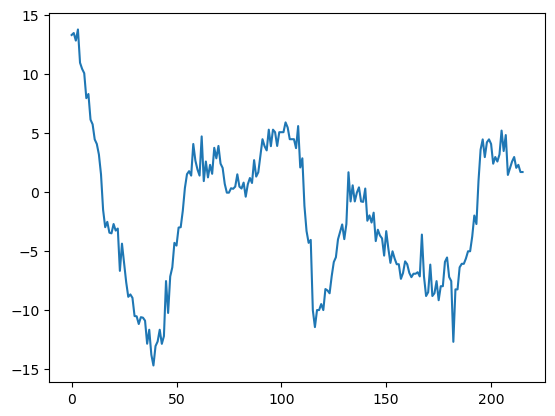

In [8]:
plt.plot(df['wind_chill'])

#### Let's improve that plot a bit

#### First let's investigate the valid column

In [9]:
df['valid']

0      2025-01-13 00:15
1      2025-01-13 00:35
2      2025-01-13 00:55
3      2025-01-13 01:15
4      2025-01-13 01:35
             ...       
211    2025-01-15 22:35
212    2025-01-15 22:55
213    2025-01-15 23:15
214    2025-01-15 23:35
215    2025-01-15 23:55
Name: valid, Length: 216, dtype: object

#### It is an object datatype, so let's use Pandas .to_datetime() function to convert it into a time datatype

In [10]:
df['time'] = pd.to_datetime(df['valid'])

In [11]:
df['time']

0     2025-01-13 00:15:00
1     2025-01-13 00:35:00
2     2025-01-13 00:55:00
3     2025-01-13 01:15:00
4     2025-01-13 01:35:00
              ...        
211   2025-01-15 22:35:00
212   2025-01-15 22:55:00
213   2025-01-15 23:15:00
214   2025-01-15 23:35:00
215   2025-01-15 23:55:00
Name: time, Length: 216, dtype: datetime64[ns]

#### Much better

In [12]:
time = df['time'] # units: UTC (every 20 minutes)
wind_chill = df['wind_chill'] # units: F
site = df['station'][0] # station name

Text(0.5, 0, 'Time (UTC)')

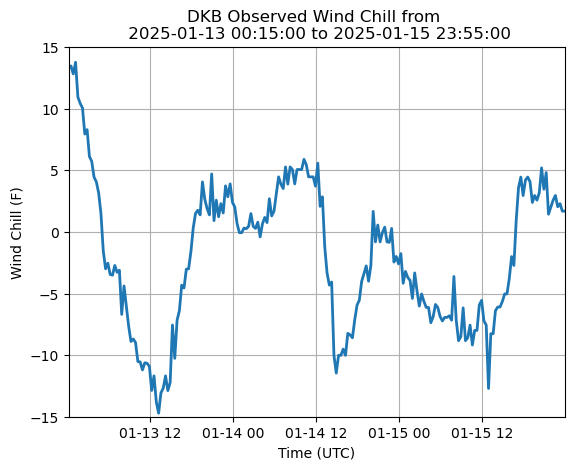

In [13]:
fig = plt.figure()
plt.plot(time, wind_chill, linewidth=2)
plt.ylim(-15, 15)
plt.xlim(time.iloc[0], time.iloc[-1])
plt.grid()
plt.title(f'{site} Observed Wind Chill from \n {time.iloc[0]} to {time.iloc[-1]}')
plt.ylabel('Wind Chill (F)')
plt.xlabel('Time (UTC)')